# Load Data

In [1]:
from utils import *

patients = data_preprocessing('AE_Visit_example5k.csv')
patients

,Pathway,FirstTimetoED,1,Time1,2,Time2,3,Time3,4,Time4,5,Time5,6,Time6,7,Time7,8,Time8,isAdmitted
1,0.0,14.166667,1,305.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
2,1.0,20.183333,2,158.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
8,1.0,7.533333,3,31.0,4,481.0,5,78.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
10,0.0,21.000000,6,51.0,2,186.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
15,1.0,10.816667,8,3.0,7,187.0,2,172.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,15.600000,3,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
4994,0.0,14.950000,5,170.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
4996,0.0,15.583333,3,62.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
4998,1.0,15.066667,3,11.0,2,205.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0


In [2]:
X_train, X_test, y_train, y_test = split_data(patients)

In [10]:
from my_model import MyModel

from lstm_model import LSTM
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

params = {'hidden_size': 64, 'lr': 0.001, 'num_epochs': 600, 'region_embedding_dim': 16,
          'time_embedding_dim': 32}

xgb_params = {
    'n_estimators': 500,
    'learning_rate': 0.01,
    'tree_method': "hist",
    'objective': 'multi:softmax',  # 使用softmax多分类目标函数
    'num_class': 3,  # 设置类别数为3
}

lgb_params = {
    'objective': 'multiclass',
    'num_class': 3,
    'learning_rate': 0.03,
}

# LSTM + XGBM

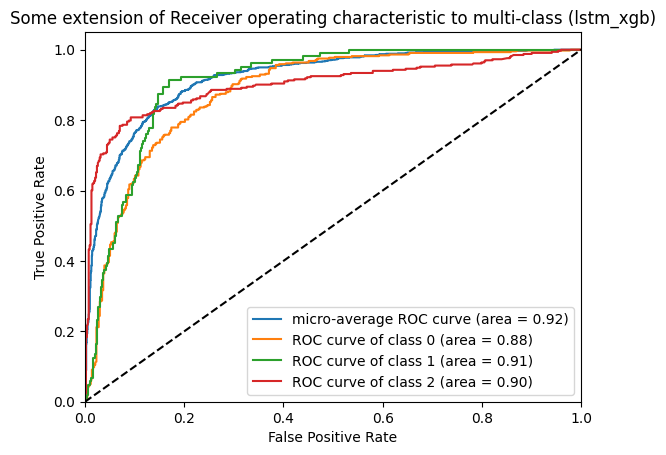

In [11]:
myLSTM = LSTM(vocab_size=15, region_embedding_dim=params['region_embedding_dim'],
              time_embedding_dim=params['time_embedding_dim'], hidden_size=params['hidden_size'], output_size=3)
xgb_classifier = XGBClassifier(**xgb_params)
my_model = MyModel(myLSTM, xgb_classifier, params)
lstm, xgb = my_model.train(X_train, y_train)
predict_proba = my_model.evaluate(lstm, xgb, X_test)
draw_roc_curve(predict_proba, y_test, 'lstm_xgb')
# my_model.save_model(lstm, xgb, 'lstm', 'xgb')

# LSTM + LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16574
[LightGBM] [Info] Number of data points in the train set: 3546, number of used features: 66
[LightGBM] [Info] Start training from score -0.701075
[LightGBM] [Info] Start training from score -2.159860
[LightGBM] [Info] Start training from score -0.945187


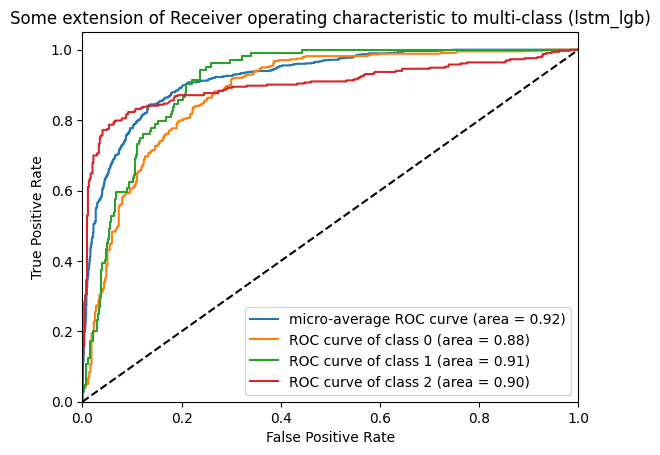

In [12]:
myLSTM = LSTM(vocab_size=15, region_embedding_dim=params['region_embedding_dim'],
              time_embedding_dim=params['time_embedding_dim'], hidden_size=params['hidden_size'], output_size=3)
lgb_classifier = LGBMClassifier(**lgb_params)
my_model = MyModel(myLSTM, lgb_classifier, params)
lstm, lgb = my_model.train(X_train, y_train)
predict_proba = my_model.evaluate(lstm, lgb, X_test)
draw_roc_curve(predict_proba, y_test, 'lstm_lgb')
# my_model.save_model(lstm, lgbm, 'lstm', 'lgb')

# LSTM + Random Forest

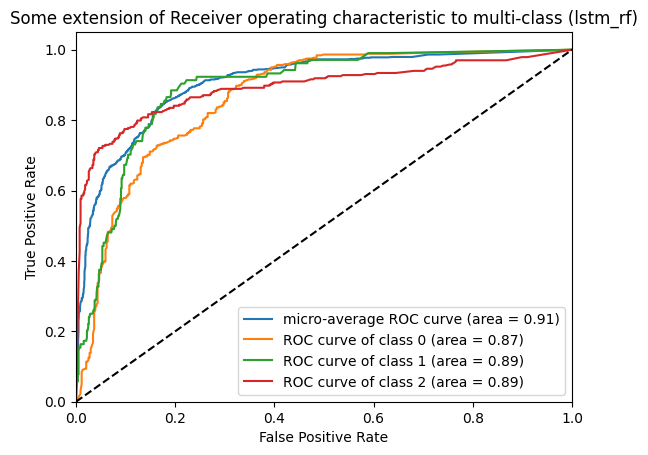

In [13]:
myLSTM = LSTM(vocab_size=15, region_embedding_dim=params['region_embedding_dim'],
              time_embedding_dim=params['time_embedding_dim'], hidden_size=params['hidden_size'], output_size=3)
rf_classifier = RandomForestClassifier(n_estimators=300)
my_model = MyModel(myLSTM, rf_classifier, params)
lstm, rf = my_model.train(X_train, y_train)
predict_proba = my_model.evaluate(lstm, rf, X_test)
draw_roc_curve(predict_proba, y_test, 'lstm_rf')

# Only LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 3546, number of used features: 12
[LightGBM] [Info] Start training from score -0.701075
[LightGBM] [Info] Start training from score -2.159860
[LightGBM] [Info] Start training from score -0.945187


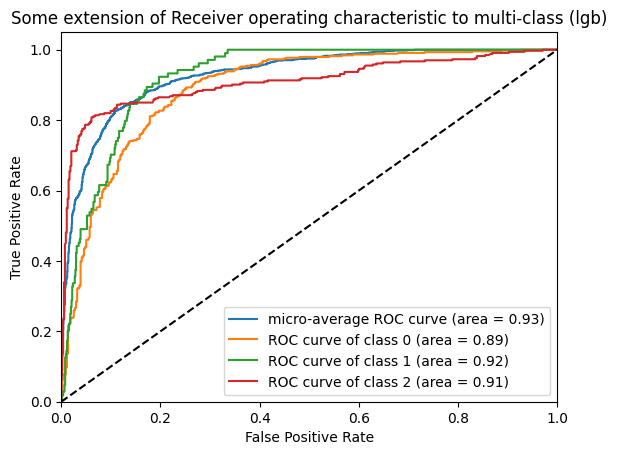

In [14]:
lgb_classifier = LGBMClassifier(**lgb_params)
lgb_classifier.fit(X_train, y_train)
predict_proba = lgb_classifier.predict_proba(X_test)
draw_roc_curve(predict_proba, y_test, 'lgb')

# Only XGBM

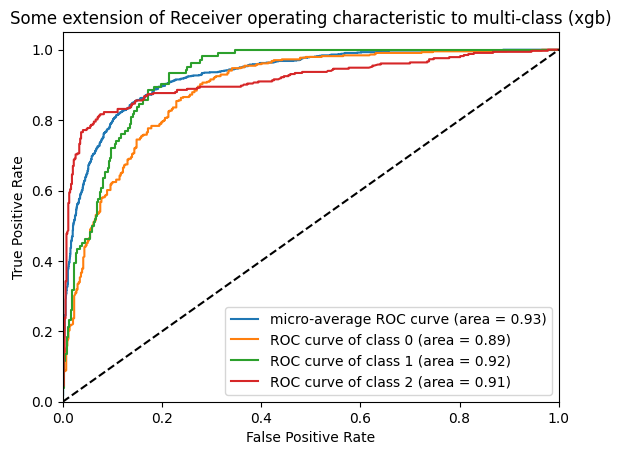

In [15]:
xgb_classifier = XGBClassifier(**xgb_params)
xgb_classifier.fit(X_train, y_train)
predict_proba = xgb_classifier.predict_proba(X_test)
draw_roc_curve(predict_proba, y_test, 'xgb')

# Only Random Forest

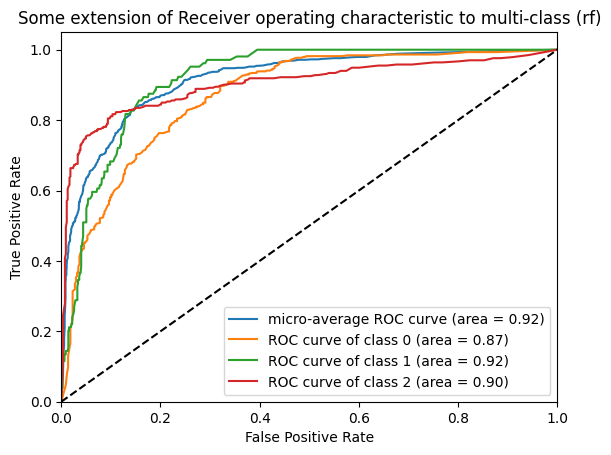

In [16]:
rf.fit(X_train, y_train)
predict_proba = rf.predict_proba(X_test)
draw_roc_curve(predict_proba, y_test, 'rf')